In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [49]:
data=pd.read_csv("C://Users//Admin//Downloads//supermarket-sales-data.csv")
data=data.drop("InvoiceID",axis=1)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Branch        1000 non-null   object 
 1   CustomerType  1000 non-null   object 
 2   Gender        1000 non-null   object 
 3   ProductType   1000 non-null   object 
 4   UnitPrice     1000 non-null   float64
 5   Quantity      1000 non-null   int64  
 6   Tax           1000 non-null   float64
 7   Total         1000 non-null   float64
 8   PaymentType   1000 non-null   object 
 9   Rating        1000 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.3+ KB


In [51]:
column_names = data.columns.tolist()
for x in column_names:
    unique_values = data[x].unique()
    print(x,":",unique_values)

Branch : ['A' 'C' 'B']
CustomerType : ['Member' 'Normal']
Gender : ['Female' 'Male']
ProductType : ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
UnitPrice : [74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84 14.48 25.51
 46.95 43.19 71.38 93.72 68.93 72.61 54.67 40.3  86.04 87.98 33.2  34.56
 88.63 52.59 33.52 87.67 88.36 24.89 94.13 78.07 83.78 96.58 99.42 68.12
 62.62 60.88 54.92 30.12 86.72 56.11 69.12 98.7  15.37 93.96 56.69 20.01
 18.93 82.63 91.4  44.59 17.87 15.43 16.16 85.98 44.34 89.6  72.35 30.61
 24.74 55.73 55.07 15.81 75.74 15.87 33.47 97.61 78.77 18.33 89.48 62.12
 48.52 75.91 74.67 41.65 49.04 78.31 20.38 99.19 96.68 19.25 80.36 48.91
 83.06 76.52 49.38 42.47 76.99 47.38 44.86 21.98 64.36 89.75 97.16 87.87
 12.45 52.75 82.7  48.71 78.55 23.07 58.26 30.35 88.67 27.38 62.13 33.98
 81.97 16.49 98.21 72.84 58.07 80.79 27.02 21.94 51.36 10.96 53.44 99.56
 57.12 99.96 63.91 56.47 93

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Branch        1000 non-null   object 
 1   CustomerType  1000 non-null   object 
 2   Gender        1000 non-null   object 
 3   ProductType   1000 non-null   object 
 4   UnitPrice     1000 non-null   float64
 5   Quantity      1000 non-null   int64  
 6   Tax           1000 non-null   float64
 7   Total         1000 non-null   float64
 8   PaymentType   1000 non-null   object 
 9   Rating        1000 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 78.3+ KB


In [53]:
data.describe()

,UnitPrice,Quantity,Tax,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,6.97270
std,26.494628,2.923431,11.708825,245.885335,1.71858
min,10.080000,1.000000,0.508500,10.678500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,5.50000
50%,55.230000,5.000000,12.088000,253.848000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,10.00000


# EDA

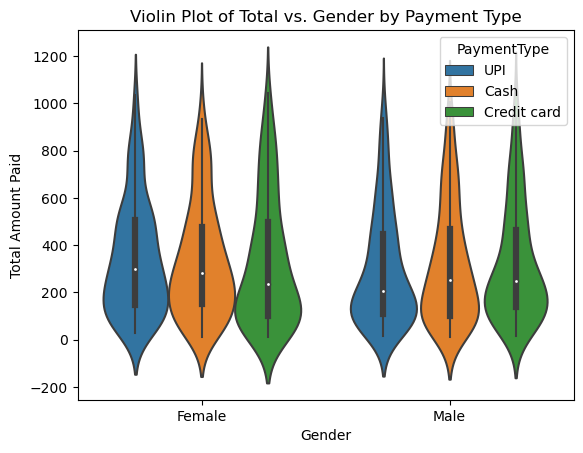

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=data, x='Gender', y='Total', hue='PaymentType')
plt.title('Violin Plot of Total vs. Gender by Payment Type')
plt.xlabel('Gender')
plt.ylabel('Total Amount Paid')

plt.show()







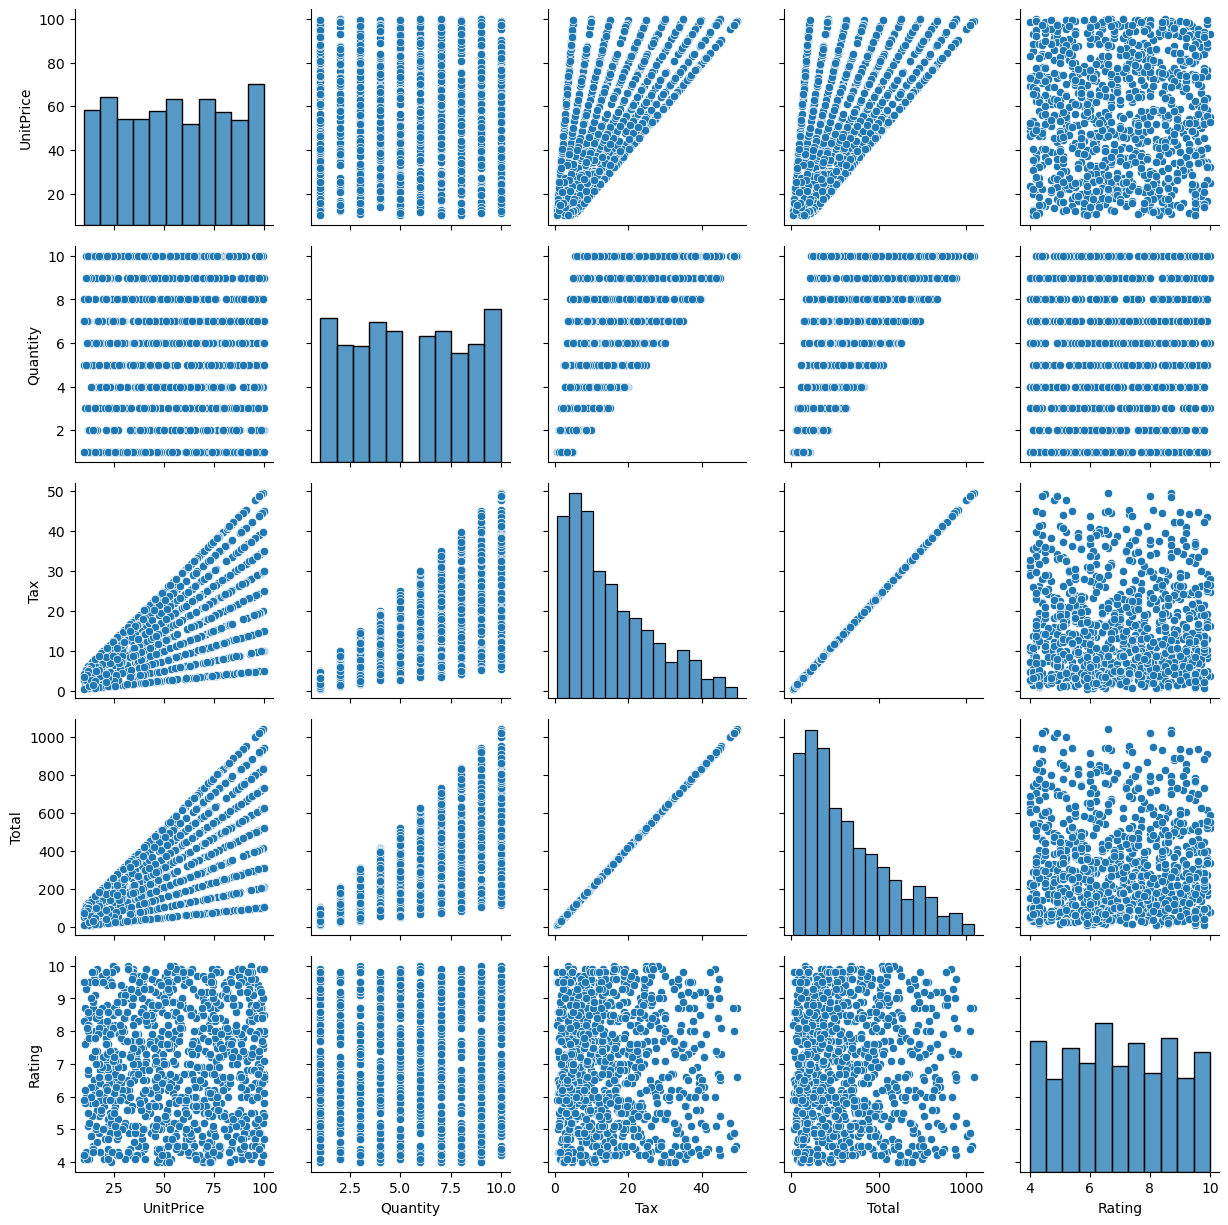

In [55]:

# Pair Grid for Pairwise Relationships
g = sns.PairGrid(data[['UnitPrice', 'Quantity', 'Tax', 'Total', 'Rating']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

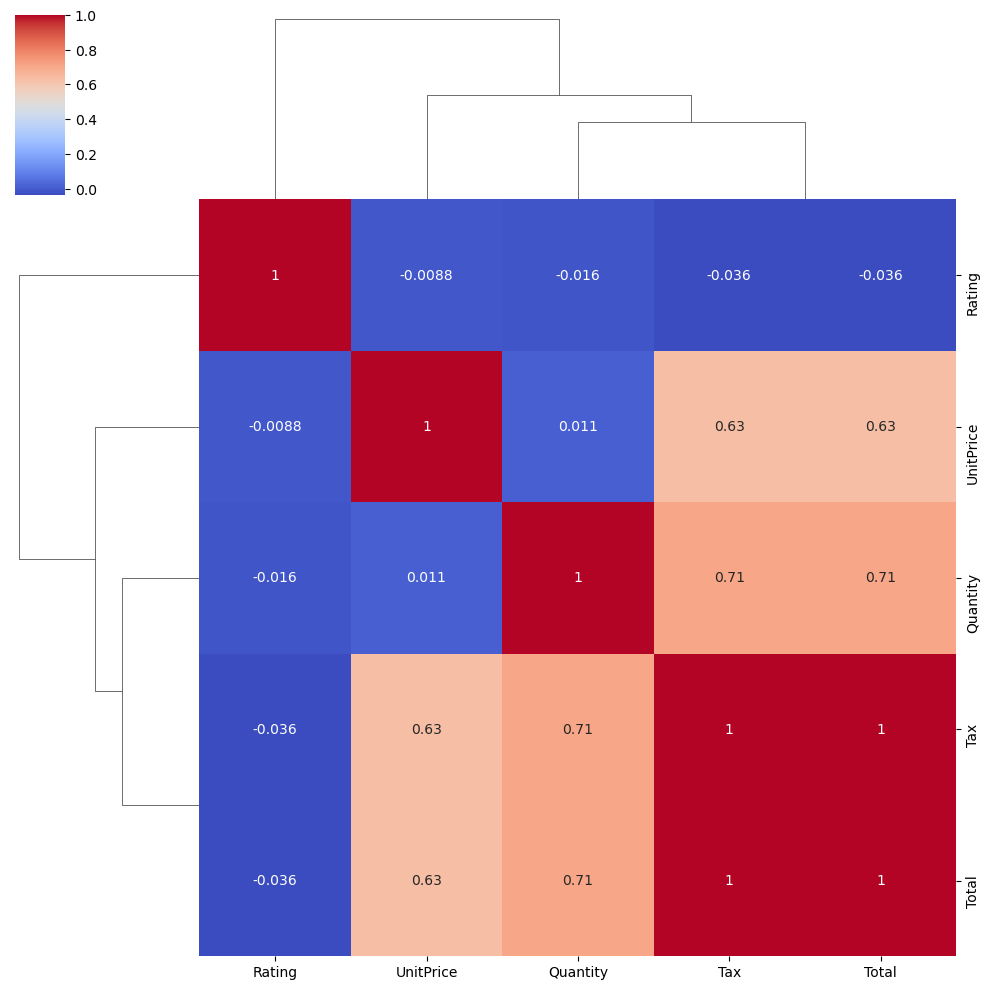

In [56]:
# Cluster Map for Hierarchical Clustering
sns.clustermap(data[['UnitPrice', 'Quantity', 'Tax', 'Total', 'Rating']].corr(), cmap='coolwarm', annot=True)
plt.show()


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


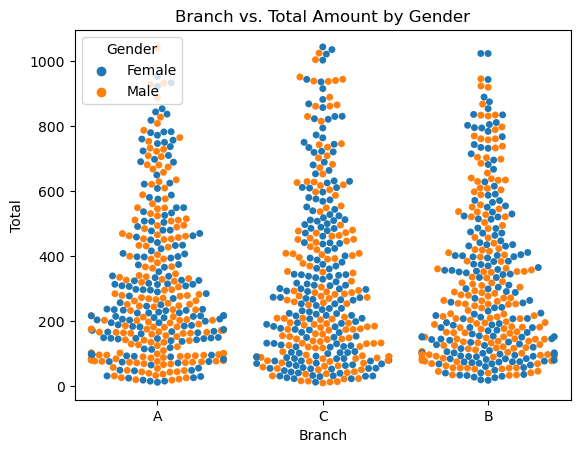

In [57]:
# Swarm Plot with Hue
sns.swarmplot(data=data, x='Branch', y='Total', hue='Gender')
plt.title('Branch vs. Total Amount by Gender')
plt.show()


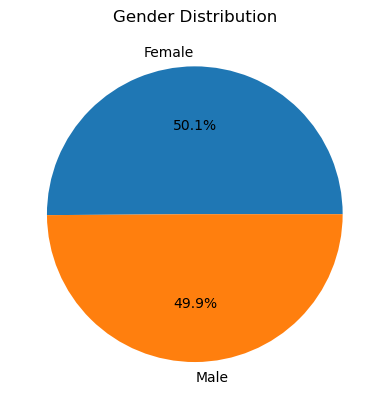

In [58]:
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

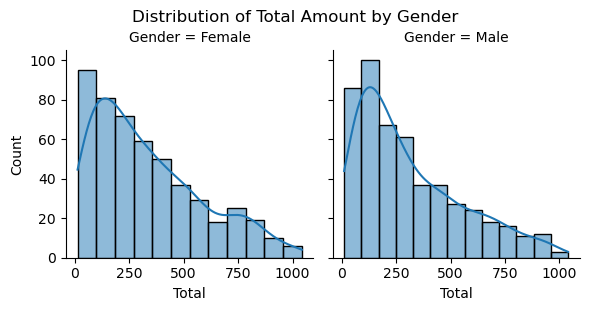

In [59]:
g = sns.FacetGrid(data, col='Gender')
g.map(sns.histplot, 'Total', kde=True)
plt.suptitle('Distribution of Total Amount by Gender', y=1.02)
plt.show()

In [60]:
data.head()

,Branch,CustomerType,Gender,ProductType,UnitPrice,Quantity,Tax,Total,PaymentType,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,UPI,9.1
1,C,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6
2,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4
3,A,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,UPI,8.4
4,A,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,UPI,5.3


There is a strong multi collinearity among many varibles

# 1.Gender Prediction

## 1.a Decision Tree

In [64]:
lblencoder=LabelEncoder()
carvar=["Branch","CustomerType","Gender","ProductType","PaymentType"]
for c in carvar:
    data[c]=lblencoder.fit_transform(data[c])


In [65]:
scaler=StandardScaler()
data["UnitPrice"]=scaler.fit_transform(data[["UnitPrice"]])
data["Quantity"]=scaler.fit_transform(data[["Quantity"]])
data["Tax"]=scaler.fit_transform(data[["Tax"]])
data["Total"]=scaler.fit_transform(data[["Total"]])

In [66]:
y=data["Gender"]
x=data.drop("Gender",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [67]:
trr=DecisionTreeClassifier()
trr.fit(x_train,y_train)
p=trr.predict(x_test)
accuracy_score(p,y_test)

0.54

In [18]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5,6,7,8,9,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [19]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=6)

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)


model = grid_search.fit(x_train, y_train)


print("Best Parameters:", grid_search.best_params_)

print("Best Score:", grid_search.best_score_)


best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best Score: 0.5485714285714286
Test Accuracy: 0.5233333333333333


## 1.b Logistic Regression

In [23]:
x_test=x_test.drop("Tax",axis=1)
x_train=x_train.drop("Tax",axis=1)

In [24]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
p=logreg.predict(x_test)
trainacc=accuracy_score(logreg.predict(x_train),y_train)
testacc=accuracy_score(p,y_test)
trainacc,testacc

(0.5742857142857143, 0.5)

In [25]:
x_test

,Branch,CustomerType,ProductType,UnitPrice,Quantity,Total,PaymentType,Rating
521,2,0,4,1.038385,0.167695,0.817881,0,7.3
737,2,1,0,0.116605,1.536635,1.196331,2,9.0
740,2,1,4,-0.002346,0.509930,0.348982,0,8.5
660,1,1,5,-0.479663,-0.859010,-0.763385,0,9.3
411,1,1,5,-1.276449,-1.201245,-1.127267,2,6.9
...,...,...,...,...,...,...,...,...
468,2,1,2,-1.287400,-1.543480,-1.221944,2,7.2
935,2,0,4,1.134679,-0.859010,-0.215447,2,5.1
428,1,1,5,0.437963,-0.174540,0.122886,0,6.9
7,2,1,4,0.675489,1.536635,1.828650,2,8.0


## 1.c Random Forest

In [70]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
randomforestaccscore=accuracy_score(y_test,rfpred)
trainacc=accuracy_score(rf.predict(x_train),y_train)
testacc=accuracy_score(rfpred,y_test)
trainacc,testacc

(1.0, 0.5)

In [27]:
k=[]
from sklearn.ensemble import RandomForestClassifier
for i in range(1,15):
    
    rf=RandomForestClassifier(max_depth=i,random_state=42)
    rf.fit(x_train,y_train)
    rfpred=rf.predict(x_test)
    randomforestaccscore=accuracy_score(y_test,rfpred)
    k.append(randomforestaccscore)


In [28]:
c=max(k)
k.index(c)

7

In [71]:
rf=RandomForestClassifier(max_depth=8,random_state=42)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
randomforestaccscore=accuracy_score(y_test,rfpred)
trainacc=accuracy_score(rf.predict(x_train),y_train)
testacc=accuracy_score(rfpred,y_test)
trainacc,testacc

(0.9685714285714285, 0.5)

In [72]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None,1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [73]:
rf1=RandomForestClassifier(random_state=42)
grid_search=GridSearchCV(estimator=rf1,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1188 candidates, totalling 5940 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [32]:
best_model = grid_search.best_estimator_

accuracy = best_model.score(x_test, y_test)
train_accuracy = best_model.score(x_train, y_train)

print("Accuracy (Test Set):", accuracy)
print("Accuracy (Training Set):", train_accuracy)

y_pred = best_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy (Test Set): 0.54
Accuracy (Training Set): 0.9785714285714285

Confusion Matrix:
 [[89 47]
 [91 73]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.65      0.56       136
           1       0.61      0.45      0.51       164

    accuracy                           0.54       300
   macro avg       0.55      0.55      0.54       300
weighted avg       0.56      0.54      0.54       300



# 2.Rating Prediction

## 2.a Linear Regression

In [77]:
x=data.drop("Rating",axis=1)
y=data["Rating"]

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [79]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predictions1 = model.predict(x_train)
mse = mean_squared_error(y_test, predictions)
mse1=mean_squared_error(y_train, predictions1)
print("Mean Squared Error on test data:", mse)
print("Mean Squared Error on train data:", mse1)

r_squared = r2_score(y_test, predictions)
r_squared1 = r2_score(y_train, predictions1)
print("R-squared Error on test data:", r_squared)
print("R-squared Error on train data:", r_squared1)

Mean Squared Error on test data: 3.0176365584754423
Mean Squared Error on train data: 2.9126497711311417
R-squared Error on test data: -0.015592012446706827
R-squared Error on train data: 0.00899450445846095


In [75]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=1)  
rfe.fit(x_train, y_train)
selected_features = x_train.columns[rfe.support_]
selected_features


Index(['Total'], dtype='object')

In [37]:
x_train=x_train[selected_features]
x_test=x_test[selected_features]

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
r_squared = r2_score(y_test, predictions)
print("R-squared Error:", r_squared)

Mean Squared Error: 2.984588270289457
R-squared Error: -0.004469540652528803


In [39]:
from sklearn.linear_model import Ridge

param_grid = {'alpha': [x for x in range(1,100)]}
model = Ridge()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
predictions = best_model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
r_squared = r2_score(y_test, predictions)
print("R-squared Error:", r_squared)

Best Parameters: {'alpha': 62}
Mean Squared Error: 2.9835870791635135
R-squared Error: -0.004132587646181962


In [80]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

# Predictions and MSE for test set
lasso_predictions_test = lasso_model.predict(x_test)
lasso_mse_test = mean_squared_error(y_test, lasso_predictions_test)
print("Lasso Test Mean Squared Error:", lasso_mse_test)
r_squared_test = r2_score(y_test, lasso_predictions_test)
print("Lasso Test R-squared Error:", r_squared_test)

# Predictions and MSE for train set
lasso_predictions_train = lasso_model.predict(x_train)
lasso_mse_train = mean_squared_error(y_train, lasso_predictions_train)
print("Lasso Train Mean Squared Error:", lasso_mse_train)
r_squared_train = r2_score(y_train, lasso_predictions_train)
print("Lasso Train R-squared Error:", r_squared_train)


Lasso Test Mean Squared Error: 2.9799391836734697
Lasso Test R-squared Error: -0.00290488064762906
Lasso Train Mean Squared Error: 2.939085387755102
Lasso Train R-squared Error: 0.0


## 2.b Decision Tree Regressor

In [41]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
r_squared = r2_score(y_test, lasso_predictions)
print("R-squared Error:", r_squared)

Mean Squared Error: 5.762833333333333
R-squared Error: -0.00290488064762906


In [43]:
k=[]
for i in range(1,10):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    k.append(mse)


In [45]:
c=min(k)
k.index(c)

0

In [83]:
# Fit Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=1)
model.fit(x_train, y_train)

# Predictions and MSE for test set
predictions_test = model.predict(x_test)
mse_test = mean_squared_error(y_test, predictions_test)
print("Decision Tree Test Mean Squared Error:", mse_test)
r_squared_test = r2_score(y_test, predictions_test)
print("Decision Tree Test R-squared Error:", r_squared_test)

# Predictions and MSE for train set
predictions_train = model.predict(x_train)
mse_train = mean_squared_error(y_train, predictions_train)
print("Decision Tree Train Mean Squared Error:", mse_train)
r_squared_train = r2_score(y_train, predictions_train)
print("Decision Tree Train R-squared Error:", r_squared_train)


Decision Tree Test Mean Squared Error: 2.998612490382921
Decision Tree Test R-squared Error: -0.009189421801805597
Decision Tree Train Mean Squared Error: 2.907389314449918
Decision Tree Train R-squared Error: 0.010784332240647898
